In [23]:
from clusopt_core.metrics import DistanceMatrix
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

def timeit(callable_):
    start=time.time()
    callable_()
    end=time.time()
    return end-start

REPETITIONS=20


In [24]:
callable_pairs=[
    ("scikit learn 1 process",lambda dataset:pairwise_distances(dataset,n_jobs=1)),
    ("scikit learn 4 processes",lambda dataset:pairwise_distances(dataset,n_jobs=1)),
    ("clusopt core",lambda dataset:dist_matrix.compute(dataset)),
    
]

dataset_configs=[ #dim
    2,20,100,1000,2000
]



In [25]:
indexes=[]
data=[]

for dim in dataset_configs:
    
    dist_matrix=DistanceMatrix(4000)

    indexes.append(str((dim)))

    entry=defaultdict(list)
    dataset,_=make_blobs(centers=42,n_samples=4000,n_features=dim,random_state=42)
    
    for _ in range(REPETITIONS):
        for method_name,callable_ in callable_pairs:
            entry[method_name].append(timeit(lambda :callable_(dataset)))

    data.append(entry)

In [26]:
mean=pd.DataFrame(
    [ 
        {
            k:np.mean(v)
            for k,v in entry.items()
        }
        for entry in data
    ],
    index=indexes
)
std=pd.DataFrame(
    [ 
        {
            k:np.std(v)
            for k,v in entry.items()
        }
        for entry in data
    ],
    index=indexes
)

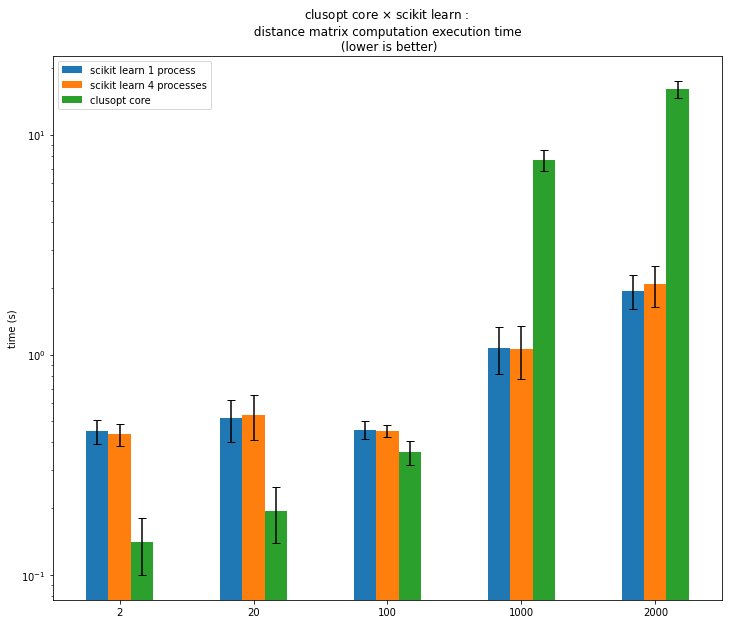

In [27]:
mean.plot.bar(ylabel="time (s)",yerr=std,capsize=4,rot=0)
plt.yscale("log")
fig=plt.gcf()
fig.set_size_inches(12, 10)

plt.title("clusopt core $\\times$ scikit learn : \n distance matrix computation execution time \n (lower is better)")
plt.savefig("dist_matrix.jpeg",dpi=300)

